In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Insurance.csv")

In [3]:
df.head()

,Numpol,Date_Debut,Date_fin,AFN_Date,AFN_Annee,Fract,Date_NE,Permis_Cat,Permis_Date,VEH,...,Sin_auto_non_resp,Ass_CP,Statut_commune,Anc_Permis,Anc_MEC,Depart,Age,Sinistralite,Sinistre_freq,Sinistre_Freq
0,C213079,01/04/2012,31/03/2013,01/04/2012,2012,ANN,03/10/1996,BSR,13/10/2010,GILERA-STALKER-50,...,NaN,81200,Ville-centre,1,1,81.0,15,0,0,Moins frequent
1,C213811,30/09/2011,31/03/2012,30/09/2011,2011,SEM,22/12/1984,A,NaN,PIAGGIO-CIAOP-50,...,NaN,13003,NaN,112,11,13.0,27,0,0,Plus fr�quent
2,C1120297,19/04/2011,30/09/2011,19/04/2011,2011,SEM,09/08/1959,A,10/12/1979,HARLEY-DAVIDSON-HERITAGESOFTAILCLASSIC-1584,...,0.0,78810,Rural,31,0,78.0,52,0,0,Plus fr�quent
3,C1134559,01/01/2011,31/03/2011,01/01/2011,2011,ANN,02/09/1983,A,10/07/2008,HONDA-HORNETABS(MOD-2007)-600,...,0.0,73800,Banlieue,2,2,73.0,27,0,0,Moins frequent
4,C1134595,01/01/2011,31/03/2011,01/01/2011,2011,ANN,05/07/1937,B,01/05/1960,PIAGGIO-MP3LTGENRETM-250,...,0.0,6400,Banlieue,51,1,NaN,73,0,0,Moyen fr�quent


In [4]:
df.columns

Index(['Numpol', 'Date_Debut', 'Date_fin', 'AFN_Date', 'AFN_Annee', 'Fract',
       'Date_NE', 'Permis_Cat', 'Permis_Date', 'VEH', 'VEH_Cyl', 'VEH_Marque',
       'VEH_Modele', 'VEH_cat', 'VEH_immat', 'VEH_1_MEC_Date', 'VEH_GPE',
       'VEH_Classe', 'Bonus_Moto', 'Bonus_Auto', 'CRM', 'Garantie', 'Formule',
       'Sin_moto_resp', 'Sin_moto_non_resp', 'Sin_moto_vol', 'Sin_auto_resp',
       'Sin_auto_non_resp', 'Ass_CP', 'Statut_commune', 'Anc_Permis ',
       'Anc_MEC', 'Depart', 'Age', 'Sinistralite', 'Sinistre_freq',
       'Sinistre_Freq'],
      dtype='object')

In [5]:
data=df[['Age', 'Bonus_Moto', 'VEH_Cyl', 'Anc_MEC', 'Anc_Permis ', 'VEH_cat']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39387 entries, 0 to 39386
Data columns (total 6 columns):
Age            39387 non-null int64
Bonus_Moto     39385 non-null float64
VEH_Cyl        39387 non-null int64
Anc_MEC        39387 non-null int64
Anc_Permis     39387 non-null int64
VEH_cat        39387 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ MB


In [7]:
def age_cat(age):
    if age>=14 and age<=29:
        return 1
    if age>=30 and age<=39:
        return 2
    if age>=40 and age<=49:
        return 3
    if age >=50 and age<=59:
        return 4
    if age>=60 and age<=80:
        return 5
    if age>80:
        return 6

def bonus_cat(x):
    if x==50:
        return 1
    if x>=51 and x<=86:
        return 2
    if x>=87 and x<=100:
        return 3
    if x>100:
        return 4
    
def veh_cat(x):
    if x in range(70,662):
        return 1
    if x in range(662,1201):
        return 2
    if x in range(1201,2301):
        return 3
    if x>2300:
        return 4
    
def mec_cat(mec):
    if mec in range(0,1):
        return 1
    if mec in range(1,6):
        return 2
    if mec in range(6,11):
        return 3
    if mec in range(11,16):
        return 4
    if mec in range(16,21):
        return 4
    if mec >= 21:
        return 5

def permis_cat(per):
    if per in range(0,7):
        return 1
    if per in range(7,26):
        return 2
    if per in range(26,36):
        return 3
    if per in range(36,61):
        return 4
    if per >= 61:
        return 5

In [8]:
#data['Age_cat'] = pd.cut(data.Age, [14,29,39,49,80,120], right=True, labels=['a1','a2','a3','a4','a5,a6'])

In [9]:
data['Age']=data['Age'].map(age_cat)
data['Bonus_Moto']=data['Bonus_Moto'].map(bonus_cat)
data['VEH_Cyl']=data['VEH_Cyl'].map(bonus_cat)
data['Anc_MEC']=data['Anc_MEC'].map(mec_cat)
data['Anc_Permis ']=data['Anc_Permis '].map(permis_cat)

/home/ibtissem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ibtissem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ibtissem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [10]:
data.head()

,Age,Bonus_Moto,VEH_Cyl,Anc_MEC,Anc_Permis,VEH_cat
0,1,NaN,1,2,1,SCOOTER
1,1,NaN,1,4,5,SCOOTER
2,4,1.0,4,1,3,GRAND TOURISME
3,1,2.0,4,2,1,ROADSTER
4,5,1.0,4,2,4,SCOOTER


In [11]:
data=data[data.columns].astype('category')

In [13]:
data.dtypes

Age            category
Bonus_Moto     category
VEH_Cyl        category
Anc_MEC        category
Anc_Permis     category
VEH_cat        category
dtype: object

In [14]:
data1=data.loc[:5000,['Age', 'Anc_Permis ', 'VEH_cat']]

In [15]:
# Indicatrices# Indic 
dc=pd.DataFrame(pd.get_dummies(data1))
dc.head()

,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Anc_Permis _1,Anc_Permis _2,Anc_Permis _3,Anc_Permis _4,...,VEH_cat_ENDURO,VEH_cat_GRAND TOURISME,VEH_cat_QUAD,VEH_cat_ROADSTER,VEH_cat_ROUTIERE BASIQUE,VEH_cat_ROUTIERE SPORTIVE,VEH_cat_SCOOTER,VEH_cat_SPORTIVE,VEH_cat_TRAIL,VEH_cat_TRIAL
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [24]:
dc.shape

(5001, 25)

In [16]:
from  mca  import  MCA
mcaFic=MCA(dc,benzecri=False)
# Valeurs singulières
print(mcaFic.L)

[0.62458632 0.50686628 0.44284878 0.3604382  0.33903967 0.33544818
 0.33409162 0.33349982 0.33333333 0.33333333 0.33333333 0.33224876
 0.33038999 0.32625962 0.29465964 0.24594451 0.23705971 0.17948504
 0.11046717]


In [28]:
mcaFic.expl_var()

array([0.15274073, 0.09741876, 0.07253401, 0.04589297, 0.03996825,
       0.03901397, 0.03865653, 0.03850111, 0.03845744, 0.03845744,
       0.03845744, 0.03817358, 0.03768954, 0.03662501, 0.0289853 ,
       0.01895649, 0.01735614, 0.00869587, 0.00221938, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [25]:
mcaFic.L.shape

(19,)

In [23]:
mcaFic.fs_c().shape

(25, 16)

In [19]:
print(mcaFic.fs_c())

[[-1.38694726e+00  1.07758252e+00 -6.79818093e-02 -9.53116469e-02
  -2.90098978e-01  8.43987948e-02  9.81156383e-02 -9.16768542e-03
   2.01208970e-21  3.52219880e-13  1.47740282e-21  6.83971127e-02
  -6.47812058e-02 -7.26946885e-02  6.03192698e-01 -8.78969291e-01]
 [-4.39869802e-01 -7.58299907e-01  6.11275402e-01 -6.11673509e-01
   2.71562093e-01  7.44868644e-03 -8.58586570e-02  8.50095591e-03
   5.40167179e-14 -4.02962281e-13  5.04753661e-14 -5.11569560e-02
   9.87279271e-02  2.93750876e-01 -7.48859194e-01  2.51239336e-01]
 [ 1.65476220e-01 -5.60978611e-01 -5.05277585e-01  8.42295082e-01
  -1.85064807e-01  2.09104228e-03  3.76565808e-02  1.54357434e-02
  -1.30129248e-13  1.03814671e-13 -6.60118413e-13  1.64801824e-02
  -4.03432784e-02 -4.14901092e-01  4.80847844e-01  1.79978740e-01]
 [ 1.13897487e+00  7.65744496e-01 -5.69511080e-01 -7.89475720e-01
   2.77003043e-01 -1.46376293e-01  7.85041048e-03 -2.59167423e-02
   2.27439070e-13  7.25864643e-14  1.05470248e-12 -6.89311664e-02
  -8.99

In [20]:
print(mcaFic.fs_r())

[[-0.85481305  0.49917661  0.21882366 ...  0.1857649   1.01393722
  -1.04094861]
 [-0.91817945  0.45019008  1.06065726 ... -6.82822713 -7.96882374
   2.62071704]
 [ 1.40075415  0.69580332 -1.07331029 ... -0.06234415 -0.21832752
  -0.03553298]
 ...
 [ 0.8774564   0.79824273 -1.11458629 ...  0.12371737 -0.24542629
   0.66565118]
 [-0.42553172  0.02738262 -0.0701966  ... -0.12516185 -1.08387261
  -0.26685713]
 [-0.28443926 -0.51450655 -0.14789112 ... -0.15854691  0.23414185
   0.61406237]]


In [22]:
mcaFic.fs_r().shape

(5001, 16)

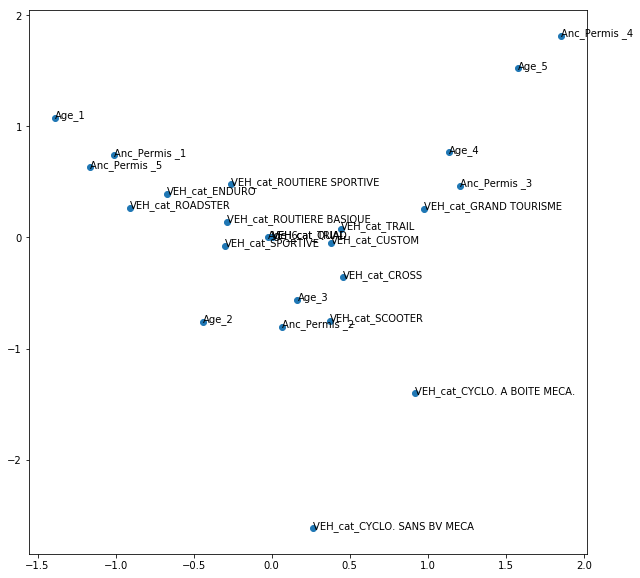

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1])
for i, j, nom in zip(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1], dc.columns):
       plt.text(i, j, nom)
plt.show()

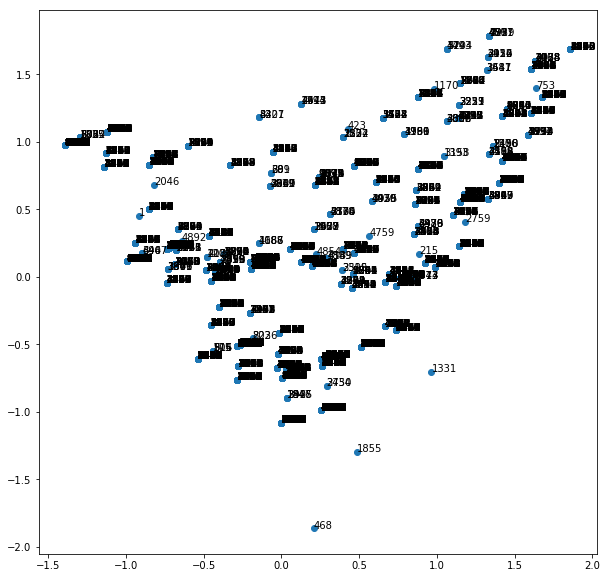

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(mcaFic.fs_r()[:, 0],mcaFic.fs_r()[:, 1])
for i, j, nom in zip(mcaFic.fs_r()[:, 0],mcaFic.fs_r()[:, 1], dc.index):
       plt.text(i, j, nom)
plt.show()